# Understand Your Data With Descriptive Statistics

You must understand your data in order to get the best results. In this chapter you will discover
7 recipes that you can use in Python to better understand your machine learning data. After
reading this lesson you will know how to:
1. Take a peek at your raw data.
2. Review the dimensions of your dataset.
3. Review the data types of attributes in your data.
4. Summarize the distribution of instances across classes in your dataset.
5. Summarize your data using descriptive statistics.
6. Understand the relationships in your data using correlations.
7. Review the skew of the distributions of each attribute.


For this we will use the Pima Indians Diabetes classification dataset
from the UCI Machine Learning repository. The Data is located at https://goo.gl/vhm1eU

Attribute Information:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In [1]:
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler

url = "https://goo.gl/vhm1eU"
#url="./PimaIndianDiabates.csv"
names = [ ' preg ' , ' plas ' , ' pres ' , ' skin ' , ' test ' , ' mass ' , ' pedi ' , ' age ' , ' class ' ]
data = pandas.read_csv(url, names=names)
peek = data.head(20)
print(peek) ## A peek of the data displays the first 20 rows.

     preg    plas    pres    skin    test    mass    pedi    age    class 
0        6     148      72      35       0    33.6   0.627     50        1
1        1      85      66      29       0    26.6   0.351     31        0
2        8     183      64       0       0    23.3   0.672     32        1
3        1      89      66      23      94    28.1   0.167     21        0
4        0     137      40      35     168    43.1   2.288     33        1
5        5     116      74       0       0    25.6   0.201     30        0
6        3      78      50      32      88    31.0   0.248     26        1
7       10     115       0       0       0    35.3   0.134     29        0
8        2     197      70      45     543    30.5   0.158     53        1
9        8     125      96       0       0     0.0   0.232     54        1
10       4     110      92       0       0    37.6   0.191     30        0
11      10     168      74       0       0    38.0   0.537     34        1
12      10     139      8

# Dimensions of your Data

Too many rows and algorithms may take too long to train. Too few and perhaps you do
not have enough data to train the algorithms.

Too many features and some algorithms can be distracted or suffer poor performance due
to the curse of dimensionality.

In [2]:
shape = data.shape
print(shape)  ## There are 768 rows and 9 columns

(768, 9)


# Descriptive statistics 

Descriptive Statistics can give you great insight into the shape of each attribute. Often you can
create more summaries than you have time to review. The describe() function on the Pandas
DataFrame lists 8 statistical properties of each attribute. They are:

1. Count.
2. Mean.
3. Standard Deviation.
4. Minimum Value.
5. 25th Percentile.
6. 50th Percentile (Median).
7. 75th Percentile.
8. Maximum Value.

In [3]:
pandas.set_option( 'display.width', 100)
pandas.set_option( 'precision', 3)
description = data.describe()
print(description)


         preg     plas     pres     skin     test     mass     pedi      age    class 
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


# Correlations Between Attributes
Correlation refers to the relationship between two variables and how they may or may not
change together. 

The most common method for calculating correlation is Pearson’s Correlation
Coefficient, that assumes a normal distribution of the attributes involved. A correlation of -1
or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no
correlation at all. Some machine learning algorithms like linear and logistic regression can suffer
poor performance if there are highly correlated attributes in your dataset. As such, it is a good
idea to review all of the pairwise correlations of the attributes in your dataset. You can use the
corr() function on the Pandas DataFrame to calculate a correlation matrix.

In [23]:
correlations = data.corr(method= 'pearson' )
print(correlations)

          preg    plas    pres    skin    test    mass    pedi    age    class 
 preg     1.000   0.129   0.141  -0.082  -0.074   0.018  -0.034  0.544    0.222
 plas     0.129   1.000   0.153   0.057   0.331   0.221   0.137  0.264    0.467
 pres     0.141   0.153   1.000   0.207   0.089   0.282   0.041  0.240    0.065
 skin    -0.082   0.057   0.207   1.000   0.437   0.393   0.184 -0.114    0.075
 test    -0.074   0.331   0.089   0.437   1.000   0.198   0.185 -0.042    0.131
 mass     0.018   0.221   0.282   0.393   0.198   1.000   0.141  0.036    0.293
 pedi    -0.034   0.137   0.041   0.184   0.185   0.141   1.000  0.034    0.174
 age      0.544   0.264   0.240  -0.114  -0.042   0.036   0.034  1.000    0.238
 class    0.222   0.467   0.065   0.075   0.131   0.293   0.174  0.238    1.000


# Skew of Univariate Distributions

Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or
squashed in one direction or another.  Normallay distributed data does not have any sqew .Many machine learning algorithms assume a Gaussia distribution. Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models. You can calculate the skew
of each attribute using the skew() function on the Pandas DataFrame.

In [24]:
skew = data.skew()
print(skew)

 preg      0.902
 plas      0.174
 pres     -1.844
 skin      0.109
 test      2.272
 mass     -0.429
 pedi      1.920
 age       1.130
 class     0.635
dtype: float64


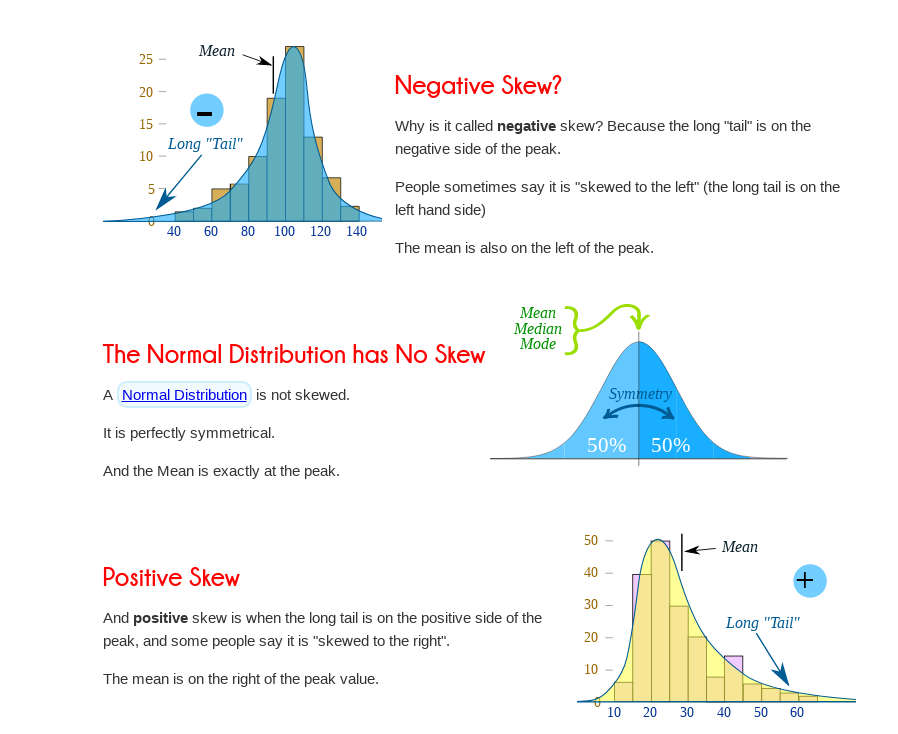

# Rescale Data
When your data is comprised of attributes with varying scales, many machine learning algorithms
can benefit from rescaling the attributes to all have the same scale. Called Normalization,
 and attributes are often rescaled into the range between 0 and 1. This is useful
for optimization algorithms in used in the core of machine learning algorithms like gradient
descent. It helps Gradient Descent converge faster.  It also makes training less sensitive to the scale of features. SO how do we do that?

In [25]:
array = data.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 10))
rescaledX = scaler.fit_transform(X)
numpy.set_printoptions(precision=3)
print(rescaledX[0:7,:])

[[ 3.529  7.437  5.902  3.535  0.     5.007  2.344  4.833]
 [ 0.588  4.271  5.41   2.929  0.     3.964  1.166  1.667]
 [ 4.706  9.196  5.246  0.     0.     3.472  2.536  1.833]
 [ 0.588  4.472  5.41   2.323  1.111  4.188  0.38   0.   ]
 [ 0.     6.884  3.279  3.535  1.986  6.423  9.436  2.   ]
 [ 2.941  5.829  6.066  0.     0.     3.815  0.525  1.5  ]
 [ 1.765  3.92   4.098  3.232  1.04   4.62   0.726  0.833]]


Copyright © 2018 Bhupathi Consulting Inc.